#### <a id='top'></a>

# Data Visualization and Probability Analysis 
***

**Name**: Noorain Baig

***

This assignment is due on Canvas by **MIDNIGHT on Monday September 14**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<br>

<a id='p1'></a>

## (15 points) Problem 1: Theory (Median Distance)
***

One way we conceptualize many data science questions is asking for the "best choice" of some parameter on data set.  We should be able to justify that our measures of centrality should in some way be the "best" ways to represent the data.


In lecture, we may have discussed the following important property of the mean:


The *sample mean* of data $X_1, X_2, \dots X_n$ is the unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n \left(X_i-c \right)^2. $$

The proof of that claim is as follows:

**Proof:**

Differentiating yields
$$f'(c)=\frac{df}{dc}\sum_{i=1}^n \left(X_i-c \right)^2 =\sum_{i=1}^n-2(X_i-c).$$ 

Setting $f'(c)=0$ gives

$$0=\sum_{i=1}^n-2(X_i-c)$$
$$=2nc-2\sum_{i=1}^n X_i$$
$$\implies\qquad  c=\frac{\sum_{i=1}^n X_i}{n}=\bar{X}$$

***

### Your exercise:

You are tasked with recreating a *similar* proof.  Prove the following:

The *median* of data $X_1, X_2, \dots X_n$ is the possibly non-unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n |X_i-c| $$

A few things to think about:

 - how do we differentiate the absolute value function?
 - what conditions might make the median non-unique in this case?  If it's nonunique, what possible values of $c$ still minimize the function $f$?

Differentiating the absolute value function: 
$$\sum_{i=1}^n(|X_i - c|) = $$

Should result in: 

$$\sum_{i=1}^n \frac{X_i - c}{X_i - c}$$ and $$\sum_{i=1}^n \frac{X_i - c}{c - X_i}$$

As a piecewise expression:

$$\sum_{i=1}^n  
 \begin{cases} 
      \frac{X_i - c}{X_i - c} & X_i < c  \\
      \frac{X_i - c}{c - X_i} & X_i > c \\
   \end{cases}
$$

Which would simplify out to: 
 \begin{cases} 
      1 & X_i < c  \\
      -1 & X_i > c \\
   \end{cases}



The only way the derivative can be zero, which is the extrema of f(c), is if there is an equal number of +1's and -1's. The derivative is nonunique. We can obtain the unique median when there is an equal number of -1 and +1, since we're essentially adding up a bunch of +1's and -1's to get the median. 

[Back to top](#top)
<a id='p2'></a>

## (40 pts) Problem 2: Computation (Streaming Means)
***

Data science is often divided into two categories: questions of *what* the best value might be to repreesnt a data problem, and questions of *how* to compute that data value.  Question 1 - and prior lectures - should tell you that computing the mean is valuable!  But *how* do we compute the mean?

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 
<a id='eq1'></a>
$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2 \qquad \tag{Equation 1}
$$

**Part A**:

How many computations - floating point operations: addition, subtraction, multiplication, division each count as 1 operation - are required to compute the mean of the data set with $n$ observations?


The number of computations to compute the mean of a dataset with n observations will be n. As an example, let's say we want to find the mean of an array with 10 elements: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. We'd do 1+2+3+4+5+6+7+8+9+10 as the first step in calculating the mean, for a total of n-1 or 9 operations. Then we would divide that sum by the number of elements, which is one more operation. This would bring the total number of operations to 10, or n. 

**Part B**:

Now suppose our data is *streaming*- we slowly add observations one at a time, instead of seeing the entire data set at once.  We are still interested in the mean, so if we stream the data set `[4,6,0,10, ...]`, we first compute the mean of the the first data point `[4]`, then we recompute the mean of the first two points `[4,6]`, then we recompute the mean of three `[4,6,0]`, and so forth.

Suppose we recompute the mean from scratch after each and every one of our $n$ observations are one-by-one added to our data set.  How many floating point operations are spent computing (and re-computing) the mean of the data set?

Because we are computing the mean without storing any previous values, we will still need to do n computations per mean computation. We'll do n operations every time we recompute the mean. So at any point, the number of computations is the sum of those n operations going from 1 to some value, which would be equal to n(n+1)/2. 

We should be convinced that streaming a mean costs a lot more computer time than just computing once!

In this problem we explore a smarter method for such an _online_ computation of the mean.  

**Result**: The following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$


A proof of this result is in the [Appendix](#Appendix) after problem 3, and requires some careful manipulations of the sum $\bar{x}_n$.  Your task will be to computationally verify and utilize this result.

**Part C**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class ([Equation 1](#eq1)). Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class ([Equation 1](#eq1)). You may **not** use any built-in sample mean or variance functions.

In [2]:
#returns the mean of the array
def my_sample_mean(arr):
    summation = 0
    arr = np.array(arr)
    for i in range(0, len(arr)):
        summation = summation + arr[i] 
    mean = summation/(len(arr))
    return mean

In [3]:
#returns the sample variance 
def sample_variance(mean, arr):
    subtraction = 0
    squares = 0
    data_points = 0
    for i in range(0, len(arr)):
        data_points +=1 
        subtraction = arr[i] - mean
        square_sub = subtraction * subtraction
        squares = squares + square_sub
    variance = squares / (data_points-1)
    return variance 

**Part D**: Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the minutes late that the BuffBus is running on Friday afternoon.

`bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42]`

In [4]:
bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42]
return_mean = my_sample_mean(bus)
print("The mean of the array is {}".format(return_mean))
return_variance = sample_variance(return_mean, bus)
print("The sample variance of the array is {}". format(return_variance))
#print('The sample variance is {}'.format(np.var(bus, ddof=1)))

The mean of the array is 56.416666666666664
The sample variance of the array is 7274.628787878787


**Part E**: Implement a third function called `update_mean` that implements the formula discussed after part B. Note that this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$, and returns $\bar{x}_{n}$. A function header and return statement are provided for you. This function may be auto-graded, so please do not change the given header API - the order of inputs matters! If you change it, you might lose points.

Use this function to compute the values that you get from taking the mean of the first buff buses' lateness, the first two buff buses' lateness, the first three buff buses' lateness, and so on up to all of the `bus` data points from **Part D**. Store your streaming bus means in a numpy array called `buffbus_bad_means`.  Report all 12 estimates in `buffbus_bad_means`.

In [5]:
# Given API:
def update_mean(prev_mean, xn, n):
    #Your code here to compute updates
    numerator = (xn-prev_mean)/n
    now_mean = prev_mean + numerator 
    return now_mean
buffbus_bad_means = []
i = 0
j = 0
for i, j in enumerate(bus):
    if(i==0):
        buffbus_bad_means.append(j)
    if(i!=0):
        new_mean = update_mean(buffbus_bad_means[i-1], j, i+1)
        buffbus_bad_means.append(new_mean)
buffbus_bad_means = np.array(buffbus_bad_means)
print(buffbus_bad_means)

[312.         158.         108.66666667  81.5         69.6
  64.5         66.85714286  60.875       55.          55.5
  57.72727273  56.41666667]


**You may report any results for part E here, if not done using print() statements**

To ensure your function complies with the given API, run this small test, where we suppose we have a mean of $\bar{x}_n = 1$ with the first $2$ data points (`prev_mean`), and we update this with the 3rd ($n=3$) data point which is $x_3=2$:

In [6]:
assert update_mean(1,2,3)==4/3, "Warning: function seems broken."

**Part F**:

How many floating point operations were spent computing the final result in your code in **part E**?  Is this truly better than the uninformed approach from **part B**?

You would have 3(n-1) floating point operations. Buffbus_bad_means is an array with 12 elements. If we used part 2E, we would end up with 3(12-1) operations, or 33 operations. If we used part 2B, we would have (12(13))/2 operations, or 78 operations. 

[Back to top](#top)

<a id='p3'></a>

## (40 pts) Problem 3: Data (Probability and Histograms)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [7]:
filepath = 'titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the probability of survival.

$$P(Survived=1)$$

In [8]:
people_that_survived = df["Survived"].sum()
#print(people_survived)

people_percent = (df["Survived"].sum()/len(df)) * 100
print("{}% of people survived the Titanic disaster".format(people_percent))

39.28170594837261% of people survived the Titanic disaster


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

If there was class warfare, we'd likely see more people with a Pclass of 1 survive than people with a Pclass of 2 or 3, with people of Pclass3 having the lowest survival rate. If male chivalry was widespread during the final hours, we'd see more women and children surivors than male survivors. __________ mutually exclusive????

**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [9]:
dfTitanic = df.dropna(how='any', subset=['Survived', 'Pclass', 'Age', 'Sex'])
#dfTitanic.head()
length = len(dfTitanic)
print("{} rows are in the dfTitanic dataframe".format(length))

714 rows are in the dfTitanic dataframe


**Part D**: Compute the probability of survival according to class, gender, and all combinations of the two variables.  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [10]:
#Probability of survival if you were an adult man:
#df1 = dfTitanic[(dfTitanic['Sex'] == 'female') & (dfTitanic['Pclass'] == 1)]
men = dfTitanic[dfTitanic["Sex"]=="male"]
men_survived = men["Survived"].sum()
men_survived_prob = men_survived / len(men)
men_survived_per = men_survived_prob * 100
print("The probability of a man surviving the Titanic disaster was {}%".format(men_survived_per))
print()

#Probability of survival if you were an adult woman: 

women = dfTitanic[dfTitanic["Sex"]=="female"]
women_survived = women["Survived"].sum()
women_survived_prob = (women_survived / len(women)) * 100
print("The probability of a woman surviving the Titanic disaster was {}%".format(women_survived_prob))
print()

The probability of a man surviving the Titanic disaster was 19.654427645788335%

The probability of a woman surviving the Titanic disaster was 74.9003984063745%



In [11]:
#Probability of survival if you were an adult in 1st class: 

Pclass1 = dfTitanic.loc[dfTitanic["Pclass"]==1]
Pclass1_survived = Pclass1["Survived"].sum()
Pclass1_survived_prob = (Pclass1_survived / len(Pclass1)) * 100
print("The probability of a 1st class passenger surviving the Titanic disaster was {}%".format(Pclass1_survived_prob))
print()

#Probability of survival if you were an adult in 2nd class:

Pclass2 = dfTitanic.loc[dfTitanic["Pclass"]==2]
Pclass2_survived = Pclass2["Survived"].sum()
Pclass2_survived_prob = (Pclass2_survived / len(Pclass2)) * 100
print("The probability of a 2nd class passenger surviving the Titanic disaster was {}%".format(Pclass2_survived_prob))
print()

#Probability of survival if you were an adult in 3rd class:

Pclass3 = dfTitanic.loc[dfTitanic["Pclass"]==3]
Pclass3_survived = Pclass3["Survived"].sum()
Pclass3_survived_prob = Pclass3_survived / len(Pclass3)
class3_percent = Pclass3_survived_prob * 100
print("The probability of a 3rd class passenger surviving the Titanic disaster was {}%".format(class3_percent))
print()

The probability of a 1st class passenger surviving the Titanic disaster was 64.28571428571429%

The probability of a 2nd class passenger surviving the Titanic disaster was 48.275862068965516%

The probability of a 3rd class passenger surviving the Titanic disaster was 25.187032418952622%



In [12]:
#divide this by total number of 

#Probability of survival if you were a 1st class woman: 
df1 = dfTitanic[(dfTitanic['Sex'] == 'female') & (dfTitanic['Pclass'] == 1)]
women_1stclass = df1['Survived'].sum()
women_1stclass_prob = (women_1stclass / len(df1)) * 100
print("The probability of a woman in 1st class surviving the Titanic disaster was {}%".format(women_1stclass_prob))
print()


#Probability of survival if you were a 1st class man: 
df2 = dfTitanic[(dfTitanic['Sex'] == 'male') & (dfTitanic['Pclass'] == 1)]
men_1stclass = df2['Survived'].sum()
men_1stclass_prob = (men_1stclass / len(df2)) * 100 
print("The probability of a man in 1st class surviving the Titanic disaster was {}%".format(men_1stclass_prob))
print()


#Probability of survival if you were a 2nd class woman: 
df3 = dfTitanic[(dfTitanic['Sex'] == 'female') & (dfTitanic['Pclass'] == 2)]
women_2class = df3['Survived'].sum()
women_2class_prob = (women_2class / len(df3)) * 100
print("The probability of a woman in 2nd class surviving the Titanic disaster was {}%".format(women_2class_prob))
print()


#Probability of survival if you were a 2nd class man: 
df4 = dfTitanic[(dfTitanic['Sex'] == 'male') & (dfTitanic['Pclass'] == 2)]
men_2class = df4['Survived'].sum()
men_2class_prob = (men_2class / len(df4)) * 100
print("The probability of a man in 2nd class surviving the Titanic disaster was {}%".format(men_2class_prob))
print()


#Probability of survival if you were a 3rd class woman:
df5 = dfTitanic[(dfTitanic['Sex'] == 'female') & (dfTitanic['Pclass'] == 3)]
women_3class = df5['Survived'].sum()
women_3class_prob = (women_3class / len(df5)) * 100
print("The probability of a woman in 3rd class surviving the Titanic disaster was {}%".format(women_3class_prob))
print()

#Probability of survival if you were a 3rd class men:
df6 = dfTitanic[(dfTitanic['Sex'] == 'male') & (dfTitanic['Pclass'] == 3)]
men_3class = df6['Survived'].sum()
men_3class_prob = (men_3class / len(df6)) * 100
print("The probability of a man in 3rd class surviving the Titanic disaster was {}%".format(men_3class_prob))
print()

#checks out

The probability of a woman in 1st class surviving the Titanic disaster was 96.0%

The probability of a man in 1st class surviving the Titanic disaster was 38.70967741935484%

The probability of a woman in 2nd class surviving the Titanic disaster was 93.10344827586206%

The probability of a man in 2nd class surviving the Titanic disaster was 18.39080459770115%

The probability of a woman in 3rd class surviving the Titanic disaster was 52.54237288135594%

The probability of a man in 3rd class surviving the Titanic disaster was 13.780918727915195%



**i) When reviewing class survival probability, how do the results compare to the base survival probability results from Part A?**

To calculate the values, I would, for example, take the number of men that survived and divide it by the total number of men on the ship. I found the class results to be really interesting because it seems women had a much higher probability than men to survive in every class. The survival rate for women in 1st class is the highest, followed closely by 2nd class, with 3rd class dipping to 52.54%. The survival rates for men were relatively low, and they were lowest at 13.78% for men in 3rd class. 


**(ii) When reviewing gender survival probability, how do the results compare to the base survival probability results from Part A?**

Women had an overall higher survival rate. The probability of men surviving in 1st class was 38.70% compared to 18.39% and 13.78% in 2nd and 3rd class. In first class, women had a survival rate of 96%, while women in 2nd and 3rd class had a survival rate of about 93% and 52%. This means there could have been male chivalry when choosing passengers for lifeboats. 


**(iii) Within each passenger class, were men or women more/less/equally likely to survive?**

Women were more likely than men to survive in each passenger class. 


**(iv) Did men in first class or women in third class have a higher survival probability?**

Men in first class had a 38.70% chance of survival while women in third class had a 52.54% chance of survival. 

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `navy` (as they were eventually rescued by ships) and those who passed away with `sandybrown`.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

In [13]:
survivors = dfTitanic[dfTitanic["Survived"]==1]
survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,42.0,1,1,PP 9549,16.7000,G6,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,19.0,0,0,248706,16.0000,NaN,S


In [14]:
deaths = dfTitanic[dfTitanic["Survived"]==0]
deaths.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,14.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,39.0,0,0,17463,51.8625,E46,S
11,12,0,1,"Bonnell, Miss. Elizabeth",female,30.0,0,0,113783,26.5500,C103,S


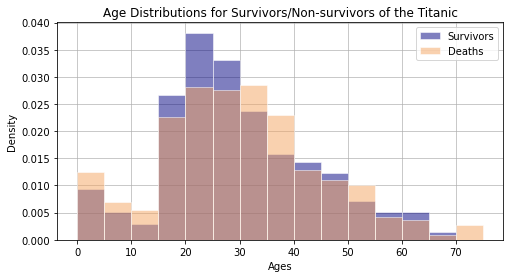

In [15]:
#two density histograms showing age distributions of passengers that surivived and died 

my_bins = range(0,80,5)

fig, ax = plt.subplots(figsize=(8,4))

survivors.hist(column="Age", label = "Survivors", density = True, alpha = 0.5, ax=ax, bins = my_bins, color = "navy", edgecolor="white");
deaths.hist(column="Age", label = "Deaths", density = True, alpha = 0.5, ax=ax, bins = my_bins, color = "sandybrown", edgecolor="white");

plt.title('Age Distributions for Survivors/Non-survivors of the Titanic')
plt.xlabel('Ages')
plt.ylabel('Density')
plt.legend()


ax.grid(alpha=0.85)
ax.set_axisbelow(True)

* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

According to the figure, the highest age range of survivors was between 20 and 30. The bars are of similar lengths for age ranges 40 to 70, and there seems to be a higher amount of children between ages 0-15 dying than surviving. The survival rates for ages 40, 40, 55, and 60 are slightly higher than the death rates, but the only columns with a distinct higher survival rate are ages 15-20, 20-25, 25-30, with 20-25 having the highest survival rate. This might be explained by the fact that younger, healthier people would be able to make it to the deck faster, and would probably beat other passengers to the lifeboats. 


**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

Frequency histograms take into account how many values fall into each bin or interval, while density histograms count the values of each bin and then adjust the height so the sum of all of the bin's areas is equal to 1. If there was a frequency histogram, the histogram for the passenger deaths would have a much higher data points than the survival rate, since only about 39% of people survived the disaster. Also, the density histogram means we're not showing the raw numbers of survivors vs deaths. 

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

The data suggests that there could have been class warfare onboard the Titanic, as the survival rates for both men and women in Class 1 were higher than the rates of surivial for both men and women in Class 2 and Class 3. There likely was also age bias, as adults from ages 20-25 had the highest rates of survival based on the histogram plotted above. There was also male chivalry, as women were more likely to survive the disaster in every passenger class based on the percentages calculated above. 

**P.S.** It is not a component of your graded assignment, but the 1997 James Cameron film _Titanic_ captured some of these very notions in some riveting cinema. Whether or not you found evidence for these cases in the data, you might find it interesting to watch the movie (or just the segments of the sinking) to see one interpretation of these ideas. You can perhaps see how we might be persuaded to reinterpret the evidence of data by a heart-wrenching performance from a handsome young Leonardo DiCaprio!

<a id='Appendix'></a>

## Appendix 

*Goal*: Prove that 
$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

Note that you can get an expression for $\bar{x}_{n-1}$ by simply replacing $n$ in Equation 1 above with $n-1$.

We'll start with $\bar{x}_n$ and massage it until we get the righthand side of the formula

\begin{eqnarray}
\nonumber \bar{x}_n &=& \frac{1}{n} \sum_{k=1}^n x_k \\
&=& \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n-1}\frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \left(\frac{1}{n-1} \sum_{k=1}^{n-1} x_k\right) + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \bar{x}_{n-1} + \frac{1}{n}x_n \\
&=& \frac{n}{n}\bar{x}_{n-1} - \frac{1}{n}\bar{x}_{n-1} + \frac{1}{n}x_n \\
&=&  \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \checkmark
\end{eqnarray}

